# RADAR Signal Processing WorkSpace

## Dependency

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import find_peaks

In [11]:
# 从CSV文件载入数据
data_address = "2.csv"

temp = np.loadtxt(data_address, delimiter=",")

radar_t_raw = np.array(temp[:,0])
radar_amplitude_raw = np.array(temp[:,1])

# 计算采样率
radar_fs = len(radar_t_raw) / radar_t_raw[-1]
print("sample rate = " + str(radar_fs))

# 根据采样率分配 t
radar_t_linear = np.arange(0,radar_t_raw[-1],1/radar_fs)

sample rate = 301.8098078914424


数据包发送频率：稳定


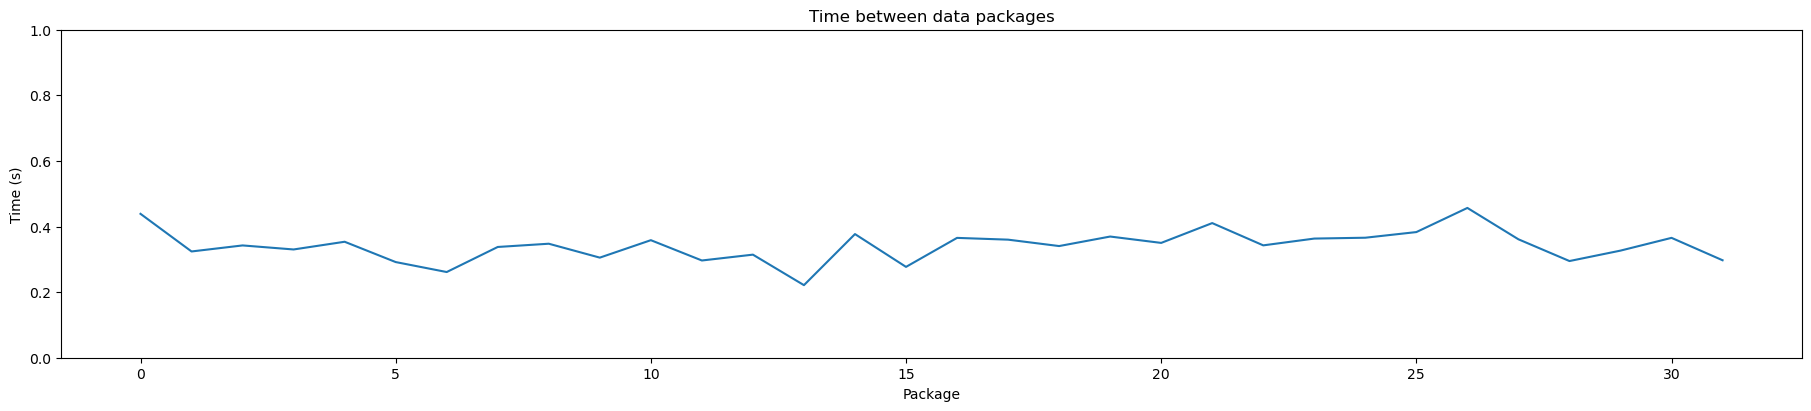

In [17]:
# 计算数据包发送间隔
fig, ax = plt.subplots(1,1,figsize=(18, 4), layout='constrained')
temp_diff = np.diff(radar_t_raw)
temp_diff = np.delete(temp_diff, np.where(temp_diff < 0.1))
ax.plot(temp_diff)
ax.set_ylim(0,1)
ax.set_title("Time between data packages")
ax.set_xlabel("Package")
ax.set_ylabel("Time (s)")

if np.std(temp_diff) < 0.05 :
    print("数据包发送频率：稳定")
else: 
    print("数据包发送频率：不稳定")


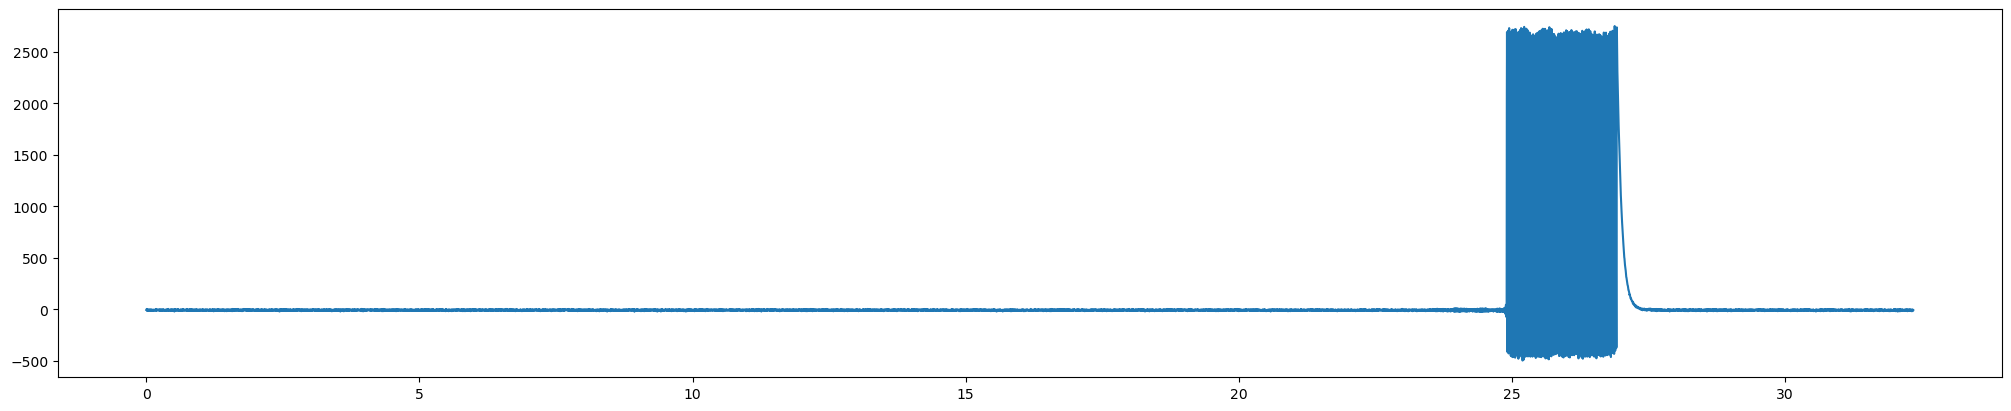

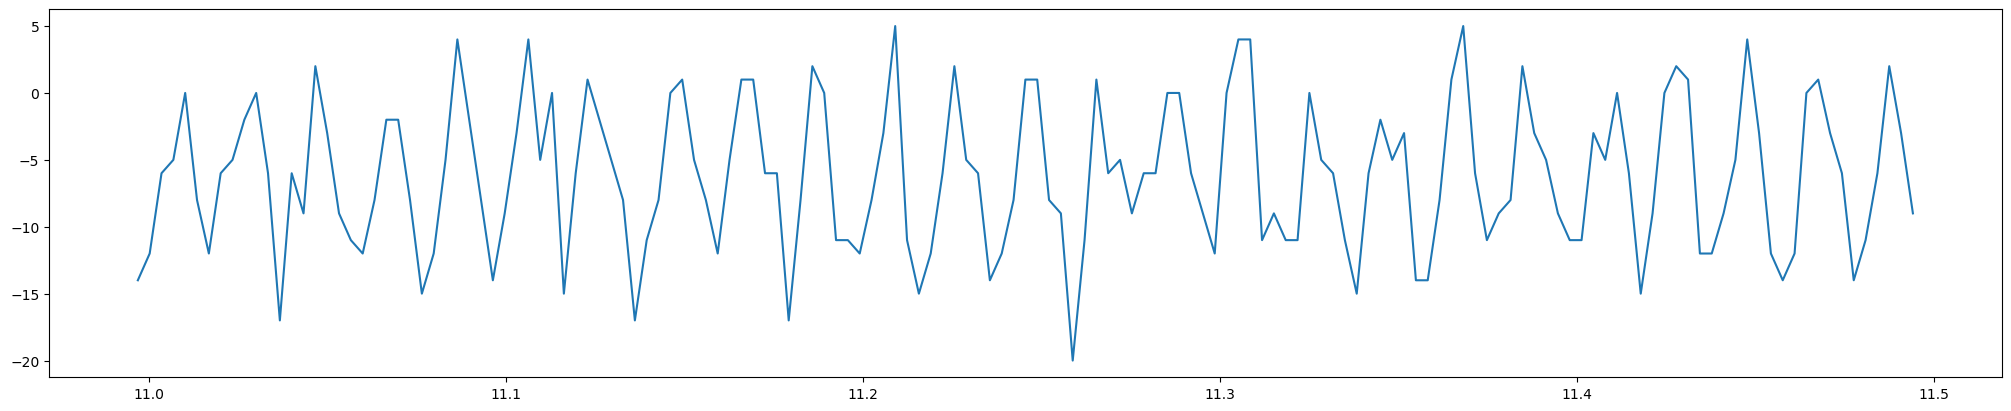

In [13]:
# 展示数据 - 完整数据
fig, ax = plt.subplots(1,1,figsize=(20, 4), layout='constrained')
ax.plot(radar_t_linear,radar_amplitude_raw)

# 展示数据 - 切片数据
start_time = 11
end_time = 11.5

fig, ax = plt.subplots(1,1,figsize=(20, 4), layout='constrained')
mslice = slice(int(start_time*radar_fs),int(end_time*radar_fs),1)
ax.plot(radar_t_linear[mslice],radar_amplitude_raw[mslice])

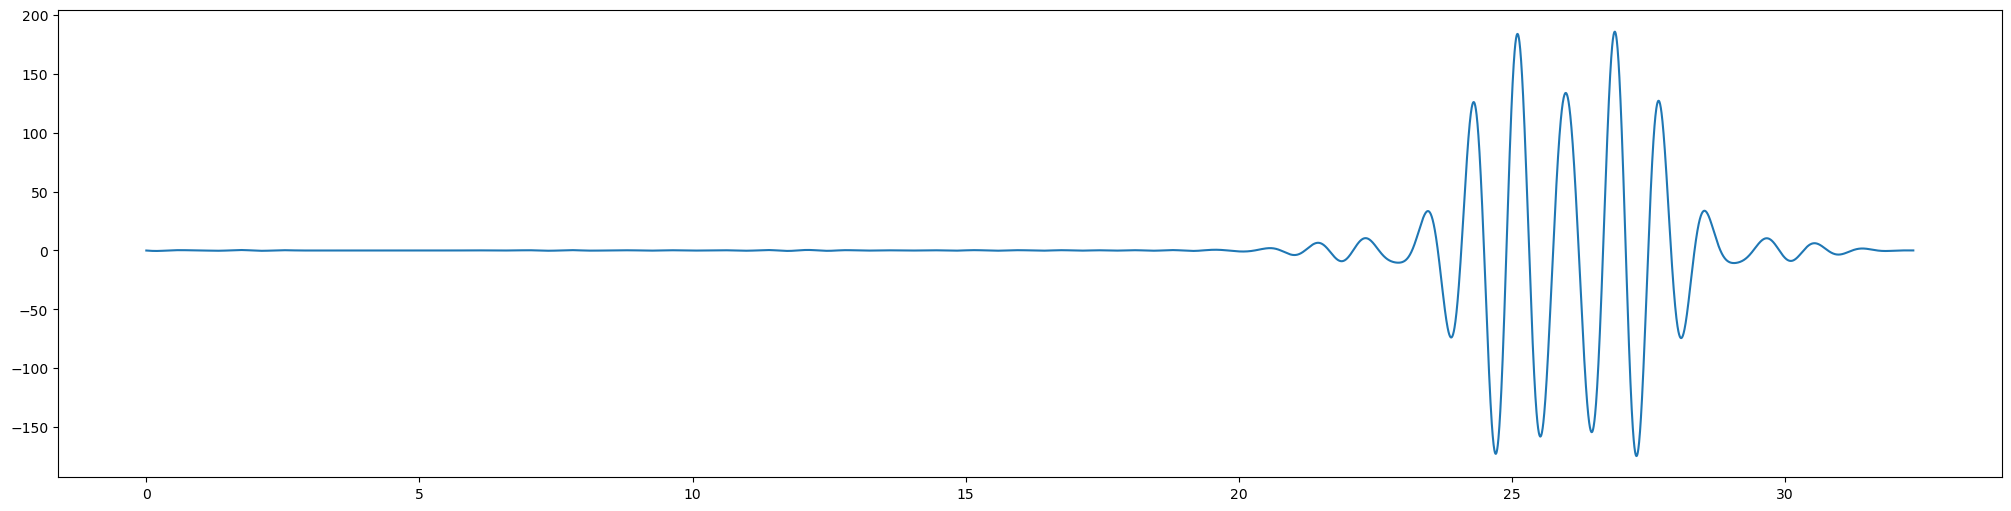

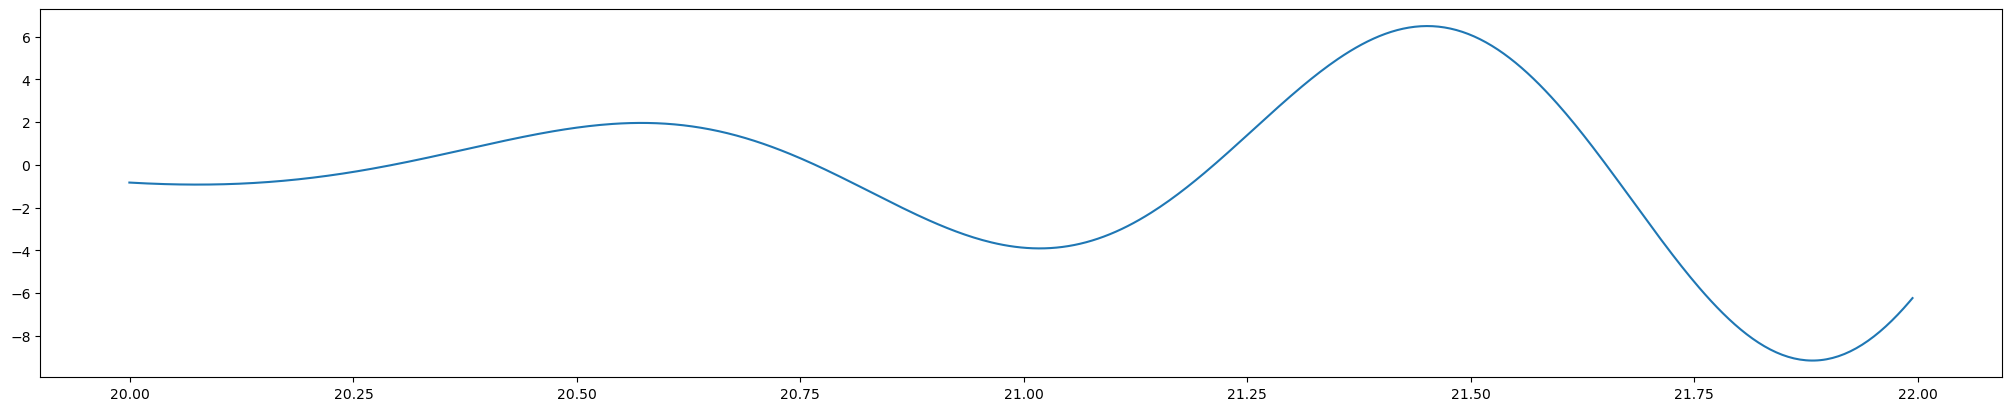

In [14]:
# 滤波
highf = 1.5
lowf = 1

b, a = signal.butter(2, [2*lowf/radar_fs,2*highf/radar_fs], 'bandpass') # 画图失败请酌情调整第一个参数（滤波器阶数）
filtedData = signal.filtfilt(b, a, radar_amplitude_raw)

fig, ax = plt.subplots(figsize=(20, 5), layout='constrained')
ax.plot(radar_t_linear,filtedData)

# 展示数据 - 切片数据
start_time = 20
end_time = 22

fig, ax = plt.subplots(1,1,figsize=(20, 4), layout='constrained')
mslice = slice(int(start_time*radar_fs),int(end_time*radar_fs),1)
ax.plot(radar_t_linear[mslice],filtedData[mslice])

每分钟心跳次数74.18512279183345


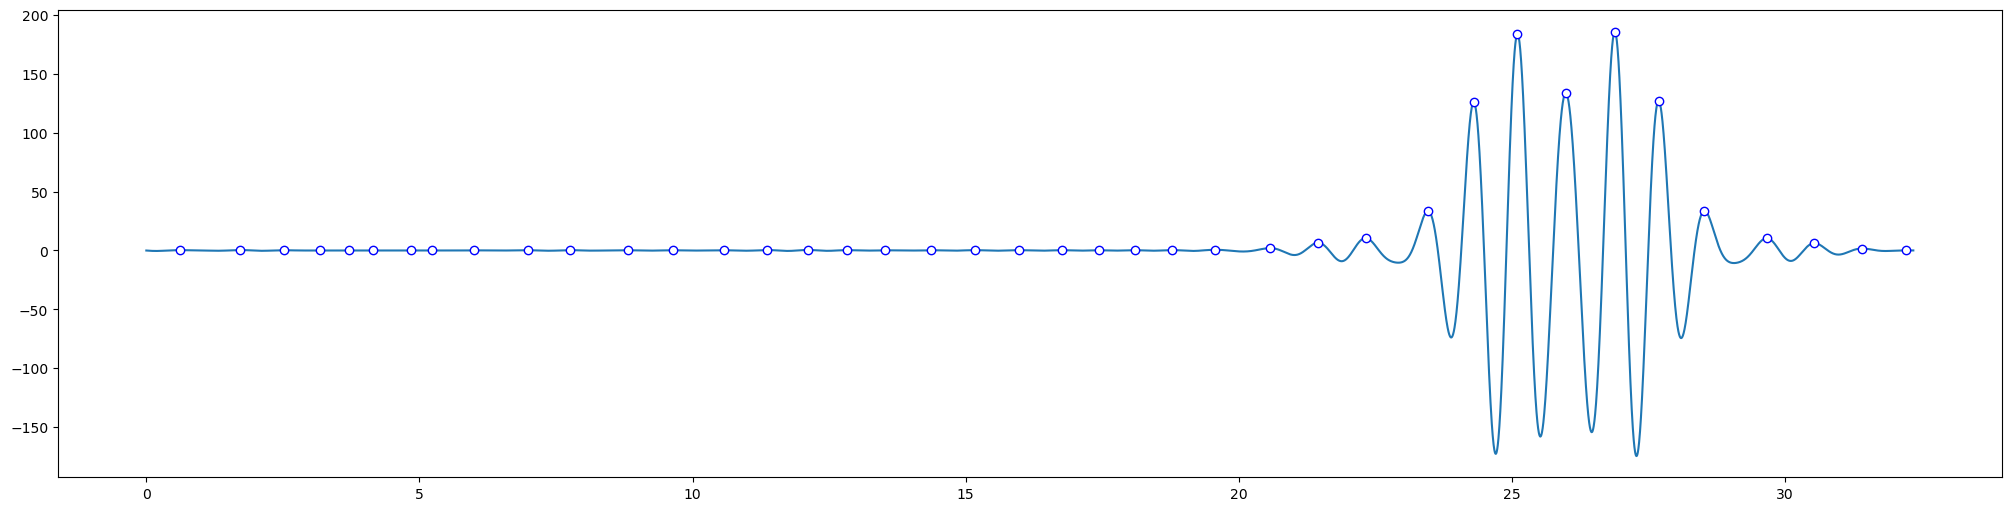

In [15]:
# 心跳

# 滤波
highf = 1.5
lowf = 1

b, a = signal.butter(2, [2*lowf/radar_fs,2*highf/radar_fs], 'bandpass') # 画图失败请酌情调整第一个参数（滤波器阶数）
filtedData = signal.filtfilt(b, a, radar_amplitude_raw)

fig, ax = plt.subplots(figsize=(20, 5), layout='constrained')
ax.plot(radar_t_linear,filtedData)

# 寻找心跳
peaks, _ = find_peaks(filtedData, distance= 0.2* radar_fs)
# print(peaks)

# 在心跳位置绘制标记
ax.plot(radar_t_linear[peaks], filtedData[peaks], 'o',color = 'blue',markerfacecolor = 'white',label ="$N_{HR}$")
print("每分钟心跳次数" + str(len(peaks)/(radar_t_raw[-1]/60)))

# peaks_np = np.array(peaks)
# peaks_diff = np.diff(peaks_np,1)
# peaks_diff = peaks_diff / radar_fs * 60
# print(peaks_diff)
# peaks_np = np.delete(peaks_np,[0,1])

# fig, ax = plt.subplots(figsize=(20, 5), layout='constrained')
# ax.plot(radar_t_linear[peaks_np] , np.array(peaks_diff) / radar_fs * 60)

# peaks_diff_smoothed = np.convolve(peaks_diff, np.ones((10,))/10, mode='same')
# ax.plot(radar_t_linear[peaks_np] , np.array(peaks_diff_smoothed) / radar_fs * 60)

# np.convolve(peaks_diff, np.ones((n,))/n, mode=mode)